In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [ ]:
df.head(50)

,Passengers,1stdiff,LogPassengers
Month,,,
1949-01-01,112,NaN,4.718499
1949-02-01,118,6.0,4.770685
1949-03-01,132,14.0,4.882802
1949-04-01,129,-3.0,4.859812
1949-05-01,121,-8.0,4.795791
1949-06-01,135,14.0,4.905275
1949-07-01,148,13.0,4.997212
1949-08-01,148,0.0,4.997212
1949-09-01,136,-12.0,4.912655


<Axes: xlabel='Month'>

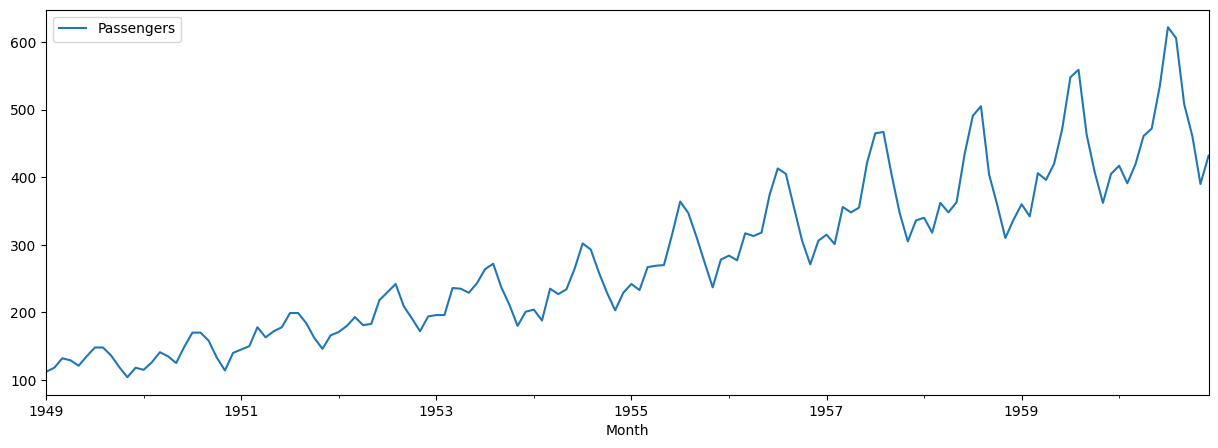

In [ ]:
df.plot(figsize=(15, 5))

In [ ]:
df['1stdiff'] = df['Passengers'].diff()

<Axes: xlabel='Month'>

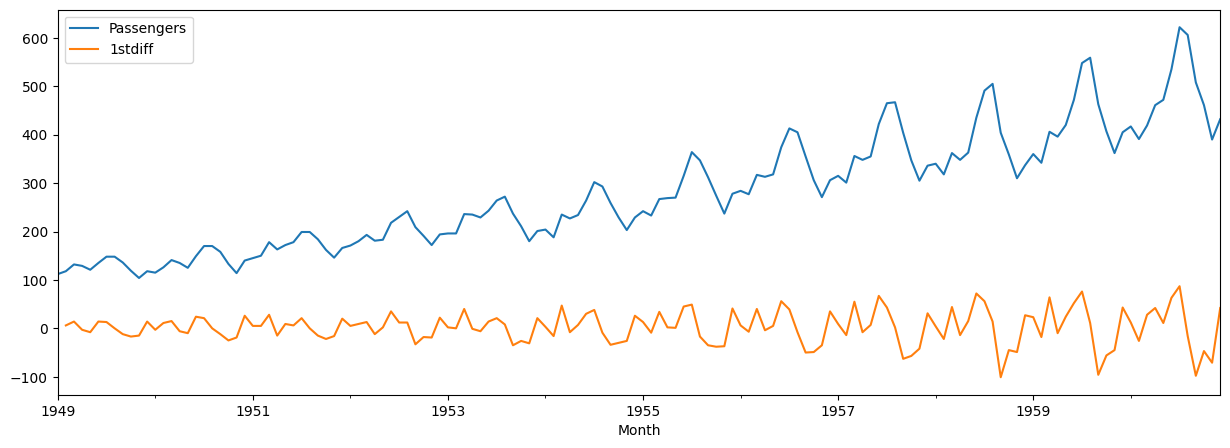

In [ ]:
df.plot(figsize=(15, 5))

<Axes: xlabel='Month'>

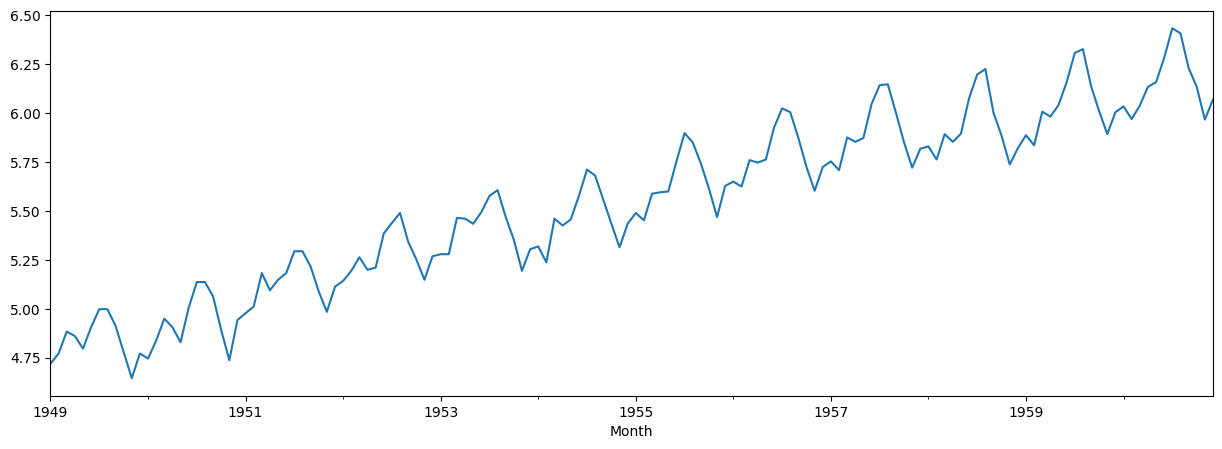

In [ ]:
df['LogPassengers'] = np.log(df['Passengers'])
df['LogPassengers'].plot(figsize=(15, 5))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [ ]:
## ARIMA
## AR(p): Model autoregresiv de ordinul p
## y = b + w1 * y-1 + w2 * y-2 + ... + wp * y-p
## MA(q): Moving average de ordinul q
## yt = c + et + o1 * et-1 + ... + oq * et-q
# et-q = valoare prezisa - valoare actuala la pasul q, et-> cunoscut in antrenare
## I(i) - Diferentiative part
def plot_fit_and_forecast_int(result, d, col='Passengers'):
  fig, ax = plt.subplots(figsize=(15,5))
  ax.plot(df[col], label="data")

  train_pred = result.predict(start=train.index[d], end=train.index[-1])
  ax.plot(train.index[d:], train_pred, color='green', label='fitted')

  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, lower, upper, color='red', alpha=0.3)

  ax.legend()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


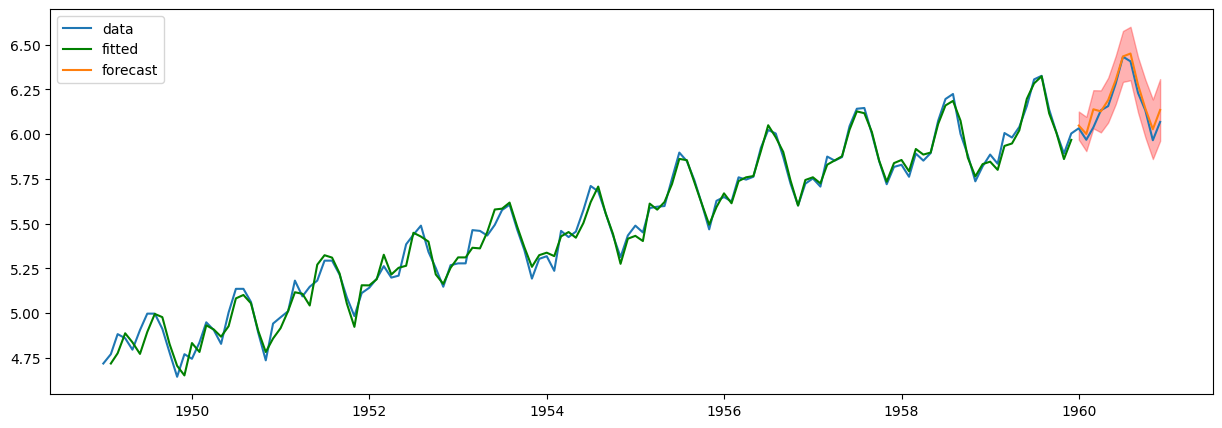

In [ ]:
arima = ARIMA(train['LogPassengers'], order=(12,1,2))
arima_result_log1212 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1212, 1, col='LogPassengers')

In [ ]:
from sklearn.metrics import r2_score
prediction_result = arima_result_log1212.get_forecast(Ntest).predicted_mean
r2_score(test['Passengers'], np.exp(prediction_result))

0.9188005492090805

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


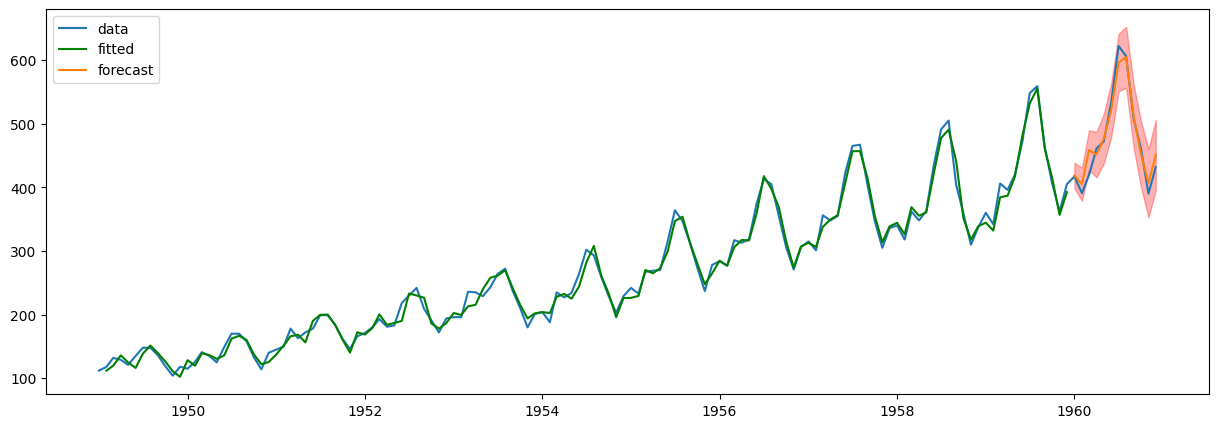

In [ ]:
arima = ARIMA(train['Passengers'], order=(12,1,2))
arima_result_1212 = arima.fit()
plot_fit_and_forecast_int(arima_result_1212, 1, col='Passengers')

In [ ]:
from sklearn.metrics import r2_score
prediction_result = arima_result_1212.get_forecast(Ntest).predicted_mean
r2_score(test['Passengers'], prediction_result)

0.9487179130766084

## RNN Aproach

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model

In [ ]:
df['DiffLogPassengers'] = df['LogPassengers'].diff()
series = df['DiffLogPassengers'].dropna().to_numpy()

T = 20
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
print(np.array(X).shape)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)

print("X.shape: ", X.shape, "Y.shape: ", Y.shape)


(123, 20)
X.shape:  (123, 20, 1) Y.shape:  (123,)


In [ ]:
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

In [ ]:
i = Input(shape=(T, 1))
x = LSTM(32)(i)
x = Dense(16, activation='relu')(x)
x = Dense(1)(x)
model = Model(i, x)

In [ ]:
## 4 * ((m*n) + (n * n) + n), m = input features, n = LSTM cells
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 20, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 32)                  │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,897 (19.13 KB)

 Trainable params: 4,897 (19.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mse', optimizer='adam')
r = model.fit(Xtrain, Ytrain, epochs=100, validation_data=(Xtest, Ytest))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - loss: 0.0112 - val_loss: 0.0112
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0105 - val_loss: 0.0112
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0124 - val_loss: 0.0111
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0111 - val_loss: 0.0110
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0117 - val_loss: 0.0108
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0107 - val_loss: 0.0104
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0101 - val_loss: 0.0102
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0104 - val_loss: 0.0102
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0104 - val_loss: 0.0101
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0107 - val_loss: 0.0097
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0099 - val_l

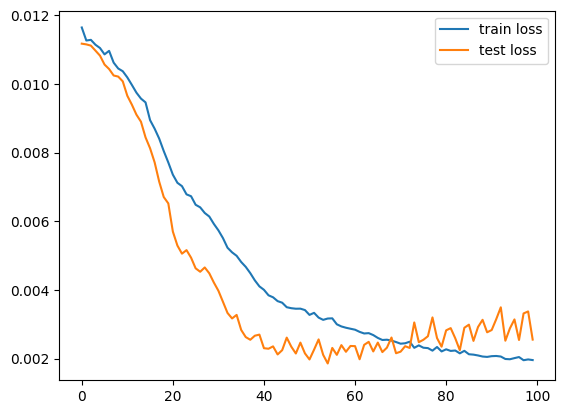

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


<Axes: xlabel='Month'>

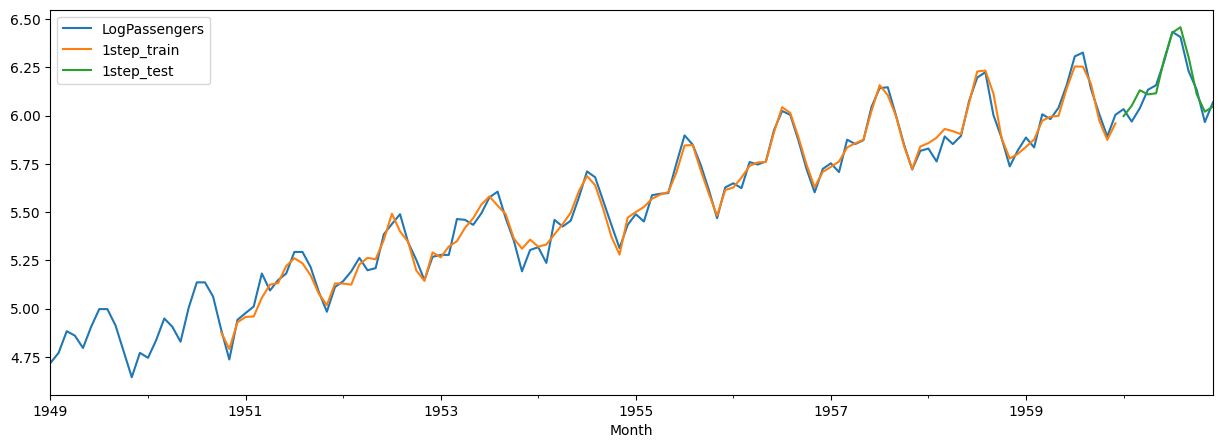

In [ ]:
# vt+1 = dift + vt -> vt+1 - vt + vt
train_idx[:T+1] = False # primele T+1 valori nu sunt de prezis
Ptrain = model.predict(Xtrain).flatten()
Ptest = model.predict(Xtest).flatten()
df['ShiftLogPassengers'] = df['LogPassengers'].shift(1)
prev = df['ShiftLogPassengers']
last_train = train.iloc[-1]['LogPassengers']
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest

df[['LogPassengers', '1step_train', '1step_test']].plot(figsize=(15,5))


In [ ]:
Ptest = model.predict(Xtest).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


<Axes: xlabel='Month'>

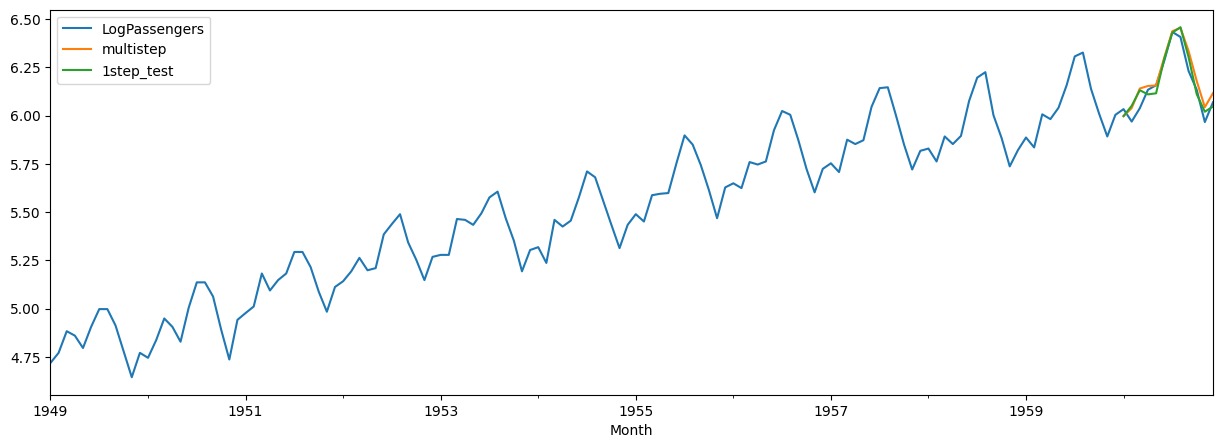

In [ ]:
## multi step prediction
multistep_predictions = []

last_x = Xtest[0]
while len(multistep_predictions) < Ntest:
  p = model.predict(last_x.reshape(1, -1, 1))[0]
  multistep_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

df.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

df[['LogPassengers', 'multistep', '1step_test']].plot(figsize=(15,5))



In [ ]:
Tx = T
Ty = Ntest

X = []
Y = []

for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)

X = np.array(X).reshape(-1, Tx, 1)
Y = np.array(Y).reshape(-1, Ty)
print("X.shape: ", X.shape, "Y.shape: ", Y.shape)

X.shape:  (112, 20, 1) Y.shape:  (112, 12)


In [ ]:
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

In [ ]:
i = Input(shape=(Tx, 1))
x = LSTM(16, return_sequences=True)(i)
x = LSTM(32, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(Ty)(x)

model = Model(i, x)

In [ ]:
model.compile(loss='mse', optimizer='adam')
r = model.fit(Xtrain_m, Ytrain_m, epochs=300, validation_data=(Xtest_m, Ytest_m))

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 0.0079 - val_loss: 0.0128
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0077 - val_loss: 0.0087
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0077 - val_loss: 0.0102
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0078 - val_loss: 0.0126
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0076 - val_loss: 0.0095
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0077 - val_loss: 0.0095
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0077 - val_loss: 0.0113
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0077 - val_loss: 0.0096
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0078 - val_loss: 0.0093
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0076 - val_loss: 0.0114
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0076 - val_loss: 0.0108
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0076 - val_l

In [ ]:
Ptrain = model.predict(Xtrain_m)
Ptest = model.predict(Xtest_m)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [ ]:
Ptrain

array([[-0.07306145, -0.00189447, -0.01077127, ...,  0.01573977,
         0.01030316, -0.00704406],
       [-0.02106137,  0.00826609,  0.0068633 , ..., -0.02177256,
        -0.01253471, -0.00059155],
       [ 0.15084615,  0.02924879,  0.0053822 , ..., -0.00372563,
        -0.06015622, -0.03329892],
       ...,
       [-0.02920681,  0.00257666, -0.00767188, ...,  0.00398041,
        -0.01115193,  0.00246072],
       [-0.10160189, -0.02857089, -0.04253029, ...,  0.04231866,
         0.0421395 , -0.00620156],
       [ 0.00869145,  0.0178452 ,  0.00446125, ..., -0.02327758,
        -0.02492111,  0.00542421]], dtype=float32)

In [ ]:
Ptest = Ptest[0]

<Axes: xlabel='Month'>

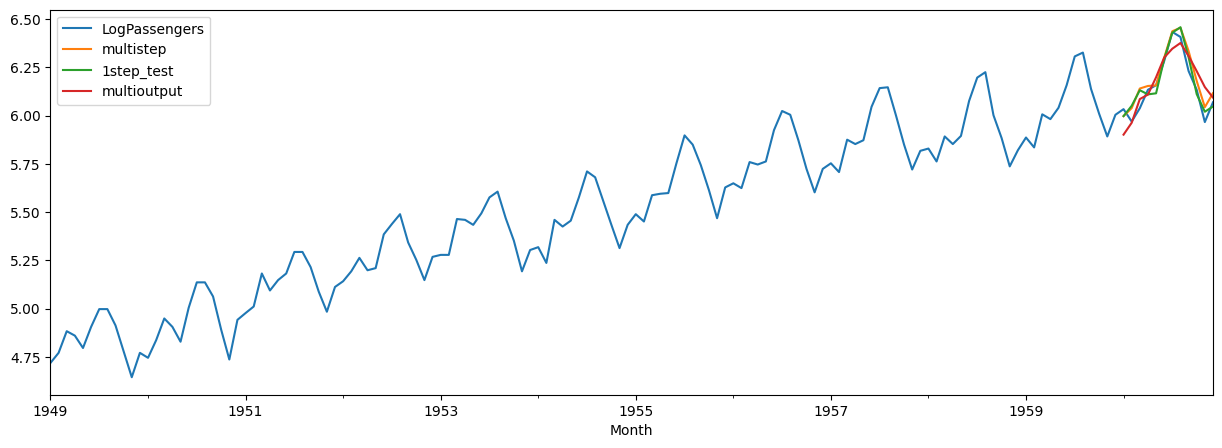

In [ ]:
df.loc[test_idx, 'multioutput'] = last_train + np.cumsum(Ptest)
df[['LogPassengers', 'multistep', '1step_test', 'multioutput']].plot(figsize=(15,5))